# Analyse des Minimalismus-Scores

Dieses Notebook lädt die vorab berechneten Analyse-Ergebnisse aus `complete_analysis_with_scores.csv` und visualisiert die Verteilung sowie die Korrelationen des Minimalismus-Scores. Es werden keine neuen Berechnungen durchgeführt, sondern nur die bestehenden Daten analysiert.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Pfad zur Analyse-Datei
analysis_file = Path('../output/amazing_logos_v4/analysis/complete_analysis_with_scores.csv')

# Daten laden
try:
    analysis_df = pd.read_csv(analysis_file)
    print(f"✅ Analyse-Daten erfolgreich geladen: {analysis_file.name}")
    print(f"   Enthält {len(analysis_df):,} Einträge.")
except FileNotFoundError:
    print(f"❌ FEHLER: Die Datei wurde nicht gefunden: {analysis_file}")
    print("   Bitte führe zuerst das Notebook 'filter_minimalistic_logos.ipynb' aus, um die Analyse-Datei zu erstellen.")
    analysis_df = None

✅ Analyse-Daten erfolgreich geladen: complete_analysis_with_scores.csv
   Enthält 352,154 Einträge.


In [2]:
# Statistische Auswertung des Minimalismus-Scores
if analysis_df is not None:
    print(f"📈 MINIMALISMUS-SCORE STATISTIKEN:")
    
    # describe() verwenden, um die wichtigsten Statistiken zu erhalten
    score_stats = analysis_df['minimalism_score'].describe()
    
    # Statistiken formatiert ausgeben
    for stat, value in score_stats.items():
        print(f"   {stat.capitalize():<8}: {value:.2f}")

📈 MINIMALISMUS-SCORE STATISTIKEN:
   Count   : 352154.00
   Mean    : 79.63
   Std     : 11.40
   Min     : 22.74
   25%     : 70.77
   50%     : 82.16
   75%     : 88.91
   Max     : 99.99


In [3]:
# Anzeige der Top- und Flop-Logos basierend auf dem Score
if analysis_df is not None:
    # DataFrame nach Score sortieren (absteigend)
    analysis_df_sorted = analysis_df.sort_values('minimalism_score', ascending=False)
    
    print(f"\n🏆 TOP 10 MINIMALISTISCHE LOGOS:")
    # Relevante Spalten für die Top 10 auswählen
    top_10 = analysis_df_sorted[['logo_id', 'minimalism_score', 'dominant_colors', 'edge_ratio', 'whitespace_ratio']].head(10)
    for idx, row in top_10.iterrows():
        print(f"   - {row['logo_id']}: Score {row['minimalism_score']:.1f} (Farben: {row['dominant_colors']}, Kanten: {row['edge_ratio']:.3f})")
    
    print(f"\n📉 TOP 10 KOMPLEXE LOGOS:")
    # Relevante Spalten für die letzten 10 auswählen
    bottom_10 = analysis_df_sorted[['logo_id', 'minimalism_score', 'dominant_colors', 'edge_ratio', 'whitespace_ratio']].tail(10)
    for idx, row in bottom_10.iterrows():
        print(f"   - {row['logo_id']}: Score {row['minimalism_score']:.1f} (Farben: {row['dominant_colors']}, Kanten: {row['edge_ratio']:.3f})")


🏆 TOP 10 MINIMALISTISCHE LOGOS:
   - amazing_logo_v4057493: Score 100.0 (Farben: 1.0, Kanten: 0.000)
   - amazing_logo_v4138616: Score 100.0 (Farben: 1.0, Kanten: 0.000)
   - amazing_logo_v4247093: Score 100.0 (Farben: 1.0, Kanten: 0.000)
   - amazing_logo_v4233901: Score 100.0 (Farben: 1.0, Kanten: 0.000)
   - amazing_logo_v4335063: Score 99.8 (Farben: 1.0, Kanten: 0.002)
   - amazing_logo_v4259561: Score 99.8 (Farben: 1.0, Kanten: 0.002)
   - amazing_logo_v4288441: Score 99.7 (Farben: 1.0, Kanten: 0.003)
   - amazing_logo_v4221859: Score 99.6 (Farben: 1.0, Kanten: 0.004)
   - amazing_logo_v4168571: Score 99.6 (Farben: 1.0, Kanten: 0.004)
   - amazing_logo_v4196077: Score 99.5 (Farben: 1.0, Kanten: 0.005)

📉 TOP 10 KOMPLEXE LOGOS:
   - amazing_logo_v4192778: Score 35.2 (Farben: 10.0, Kanten: 0.418)
   - amazing_logo_v4203199: Score 34.3 (Farben: 10.0, Kanten: 0.325)
   - amazing_logo_v4237245: Score 33.7 (Farben: 10.0, Kanten: 0.254)
   - amazing_logo_v4028439: Score 33.5 (Farben: 10

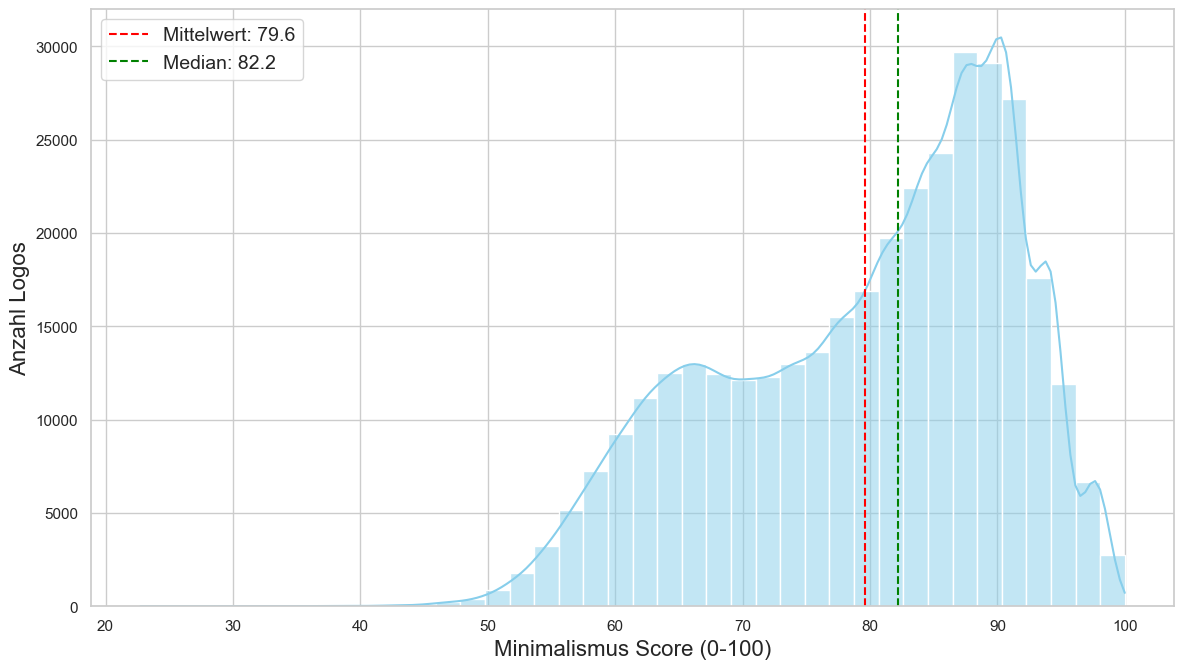


Grafik gespeichert unter: ..\output\amazing_logos_v4\analysis\minimalism_score_distribution.png


In [9]:
# Visualisierung der Score-Analyse
if analysis_df is not None:
    # Seaborn-Stil für schönere Plots setzen
    sns.set_theme(style="whitegrid")
    
    plt.figure(figsize=(12, 7))
    # Score-Verteilung (Histogramm)
    sns.histplot(analysis_df['minimalism_score'], bins=40, kde=True, color='skyblue')
    plt.axvline(analysis_df['minimalism_score'].mean(), color='red', linestyle='--', label=f'Mittelwert: {analysis_df["minimalism_score"].mean():.1f}')
    plt.axvline(analysis_df['minimalism_score'].median(), color='green', linestyle='--', label=f'Median: {analysis_df["minimalism_score"].median():.1f}')
    plt.xlabel('Minimalismus Score (0-100)', fontsize=16)
    plt.ylabel('Anzahl Logos', fontsize=16)
    plt.legend( fontsize=14)

    plt.tight_layout(rect=[0, 0, 1, 0.98])
    
    # Bild speichern
    output_path = Path('../output/amazing_logos_v4/analysis/')
    output_path.mkdir(exist_ok=True)
    plt.savefig(output_path / 'minimalism_score_distribution.png', dpi=300, bbox_inches='tight')
    
    plt.show()
    print(f"\nGrafik gespeichert unter: {output_path / 'minimalism_score_distribution.png'}")
else:
    print("Keine Daten zum Visualisieren vorhanden.")